# Unsupervised Learning

## K Means Clustering

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df= sns.load_dataset('titanic')

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df['age']= df['age'].fillna(df['age'].mean())
x= df[['age','fare']]
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [21]:
x.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [22]:
x_scaled

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [23]:
model= KMeans(n_clusters=3)
model.fit(x_scaled)

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [24]:
#  Assign cluster labels

df['cluster']= model.labels_
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [25]:
df['cluster'].unique()

array([1, 0, 2])

<Axes: xlabel='age', ylabel='fare'>

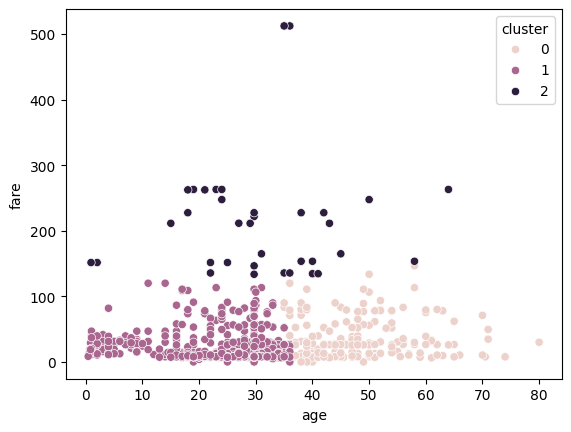

In [26]:
# plot the clusters

sns.scatterplot(x='age', y='fare', hue='cluster', data=df)

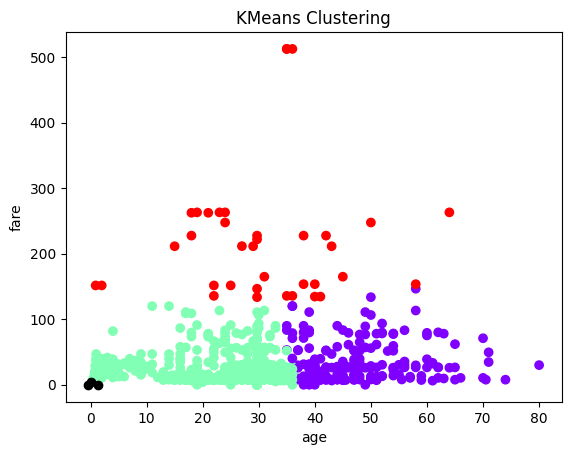

In [27]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('KMeans Clustering')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='black')
plt.show()

In [28]:
import plotly.express as px
fig= px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [ ]:
# fig= px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
# fig.show()

In [ ]:

# Run only if u have a heavy machine otherwise it will make notebook unresponsive.

# px.parallel_coordinates(df, color='cluster')
# fig.show()

In [17]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


# Save the model

In [29]:
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']

In [30]:
loaded_model= joblib.load('model.joblib')